In [ ]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
df=pd.read_csv('/content/carbon_nanotubes.csv', sep=';')
df.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,"0,679005","0,701318","0,017033","0,721039","0,730232","0,017014"
1,2,1,"0,717298","0,642129","0,231319","0,738414","0,65675","0,232369"
2,2,1,"0,489336","0,303751","0,088462","0,477676","0,263221","0,088712"
3,2,1,"0,413957","0,632996","0,040843","0,408823","0,657897","0,039796"
4,2,1,"0,334292","0,543401","0,15989","0,303349","0,558807","0,157373"


In [ ]:
df.shape

(10721, 8)

In [ ]:
df.isna().sum()

Chiral indice n                     0
Chiral indice m                     0
Initial atomic coordinate u         0
Initial atomic coordinate v         0
Initial atomic coordinate w         0
Calculated atomic coordinates u'    0
Calculated atomic coordinates v'    0
Calculated atomic coordinates w'    0
dtype: int64

In [ ]:
df.describe()

,Chiral indice n,Chiral indice m
count,10721.000000,10721.000000
mean,8.225725,3.337189
std,2.138919,1.683881
min,2.000000,1.000000
25%,7.000000,2.000000
50%,8.000000,3.000000
75%,10.000000,5.000000
max,12.000000,6.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10721 entries, 0 to 10720
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Chiral indice n                   10721 non-null  int64 
 1   Chiral indice m                   10721 non-null  int64 
 2   Initial atomic coordinate u       10721 non-null  object
 3   Initial atomic coordinate v       10721 non-null  object
 4   Initial atomic coordinate w       10721 non-null  object
 5   Calculated atomic coordinates u'  10721 non-null  object
 6   Calculated atomic coordinates v'  10721 non-null  object
 7   Calculated atomic coordinates w'  10721 non-null  object
dtypes: int64(2), object(6)
memory usage: 670.2+ KB


In [ ]:
for column in df.columns:
    if df[column].dtype=='object':
        df[column] = [float(string.replace(',', '.')) for string in df[column]]

df.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,0.679005,0.701318,0.017033,0.721039,0.730232,0.017014
1,2,1,0.717298,0.642129,0.231319,0.738414,0.656750,0.232369
2,2,1,0.489336,0.303751,0.088462,0.477676,0.263221,0.088712
3,2,1,0.413957,0.632996,0.040843,0.408823,0.657897,0.039796
4,2,1,0.334292,0.543401,0.159890,0.303349,0.558807,0.157373


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10721 entries, 0 to 10720
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Chiral indice n                   10721 non-null  int64  
 1   Chiral indice m                   10721 non-null  int64  
 2   Initial atomic coordinate u       10721 non-null  float64
 3   Initial atomic coordinate v       10721 non-null  float64
 4   Initial atomic coordinate w       10721 non-null  float64
 5   Calculated atomic coordinates u'  10721 non-null  float64
 6   Calculated atomic coordinates v'  10721 non-null  float64
 7   Calculated atomic coordinates w'  10721 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 670.2 KB


In [ ]:
#Data visualisation

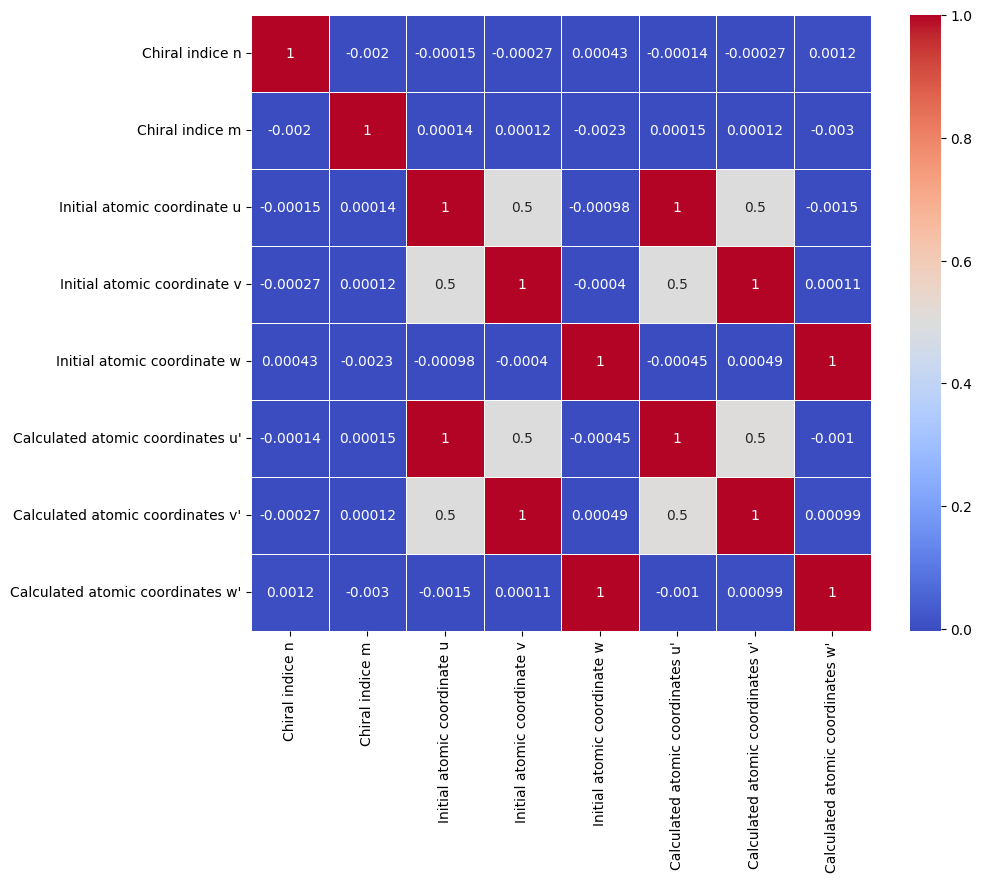

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)
plt.show()

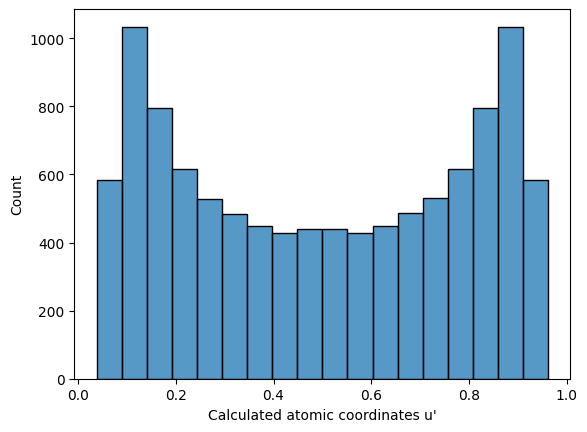

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='Calculated atomic coordinates u\'', data=df)
plt.show()

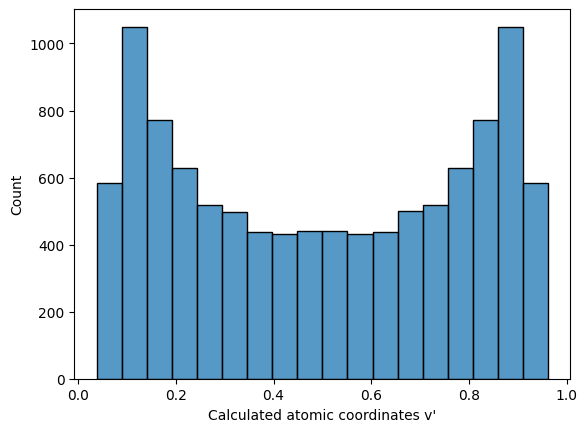

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='Calculated atomic coordinates v\'', data=df)
plt.show()

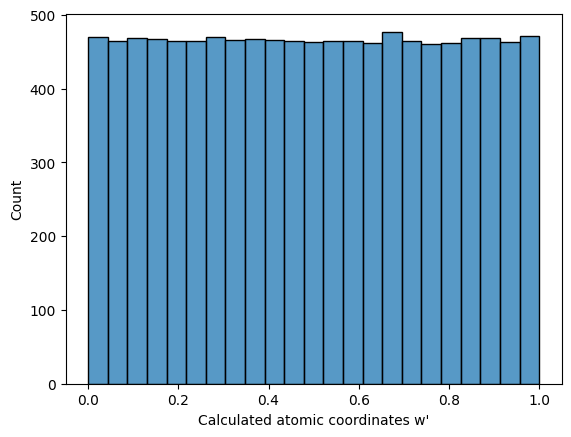

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='Calculated atomic coordinates w\'', data=df)
plt.show()

In [ ]:
target = df.iloc[:, -3]
input = df.iloc[:, :-3]
print(target.shape)
print(input.shape)

(10721,)
(10721, 5)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(input, target, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(7504, 5)
(3217, 5)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_std, y_train)

LinearRegression()

In [ ]:
lr_train_result=lr.predict(x_train_std)
lr_test_result=lr.predict(x_test_std)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Training results: ')
lr_train_mse = mean_squared_error(y_train, lr_train_result)
print("MSE: ", lr_train_mse)
lr_train_r2 = r2_score(y_train, lr_train_result)
print("R2_score: ", lr_train_r2)
print('Testing results: ')
lr_test_mse=mean_squared_error(y_test, lr_test_result)
print("MSE: ", lr_test_mse)
lr_test_r2=r2_score(y_test, lr_test_result)
print("R2_score: ", lr_test_r2)

Training results: 
MSE:  1.4280433334619471e-05
R2_score:  0.999832104697807
Testing results: 
MSE:  0.00010178929815407621
R2_score:  0.9987823892288538


In [ ]:
from sklearn.linear_model import RANSACRegressor
ransac=RANSACRegressor(LinearRegression(), min_samples=50, residual_threshold=0.3)
ransac.fit(x_train_std, y_train)

RANSACRegressor(estimator=LinearRegression(), min_samples=50,
                residual_threshold=0.3)

In [ ]:
print(ransac.inlier_mask_)

[ True  True  True ...  True  True  True]


In [ ]:
outlier=np.logical_not(ransac.inlier_mask_)
print(outlier)

[False False False ... False False False]


In [ ]:
ransac_train_result=ransac.predict(x_train_std)
ransac_test_result=ransac.predict(x_test_std)
print('Training results: ')
ransac_train_mse = mean_squared_error(y_train, ransac_train_result)
print("MSE: ", ransac_train_mse)
ransac_train_r2 = r2_score(y_train, ransac_train_result)
print("R2_score: ", ransac_train_r2)
print('Testing results: ')
ransac_test_mse=mean_squared_error(y_test, ransac_test_result)
print("MSE: ", ransac_test_mse)
ransac_test_r2=r2_score(y_test, ransac_test_result)
print("R2_score: ", ransac_test_r2)

Training results: 
MSE:  1.4280433334619475e-05
R2_score:  0.999832104697807
Testing results: 
MSE:  0.0001017892981540762
R2_score:  0.9987823892288538


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_std, y_train)
dt_train_result=dt.predict(x_train_std)
dt_test_result=dt.predict(x_test_std)
print('Training results: ')
dt_train_mse=mean_squared_error(y_train, dt_train_result)
print("MSE: ", dt_train_mse)
dt_train_r2=r2_score(y_train, dt_train_result)
print("R2_score: ", dt_train_r2)
print("Testing results: ")
dt_test_mse=mean_squared_error(y_test, dt_test_result)
print("MSE: ", dt_test_mse)
dt_test_r2=r2_score(y_test, dt_test_result)
print("R2_score: ", dt_test_r2)

Training results: 
MSE:  5.204938602368489e-35
R2_score:  1.0
Testing results: 
MSE:  0.0001089228890609263
R2_score:  0.9986970567107734


In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(x_train_std, y_train)
svr_train_result=svr.predict(x_train_std)
svr_test_result=svr.predict(x_test_std)
print('Training results: ')
svr_train_mse=mean_squared_error(y_train, svr_train_result)
print("MSE: ", svr_train_mse)
svr_train_r2=r2_score(y_train, svr_train_result)
print("R2_score: ", svr_train_r2)
print("Testing results: ")
svr_test_mse=mean_squared_error(y_test, svr_test_result)
print("MSE: ", svr_test_mse)
svr_test_r2=r2_score(y_test, svr_test_result)
print("R2_score: ", svr_test_r2)

Training results: 
MSE:  0.0039691006284828185
R2_score:  0.9533352151269772
Testing results: 
MSE:  0.003742688106314059
R2_score:  0.9552297006273603


Text(0.5, 1.0, 'Comparative MSE Scores')

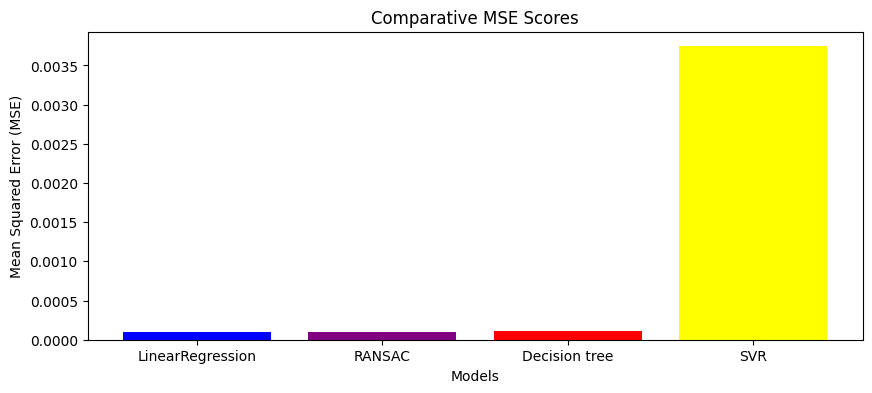

In [ ]:
import matplotlib.pyplot as plt
# Create a comparative visualization
plt.figure(figsize=(10, 4))
models = ['LinearRegression', 'RANSAC', 'Decision tree', 'SVR']
mse_scores = [lr_test_mse, ransac_test_mse, dt_test_mse, svr_test_mse]
# Plot Mean Squared Error (MSE)

plt.bar(models, mse_scores, color=['blue', 'purple', 'red', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparative MSE Scores')

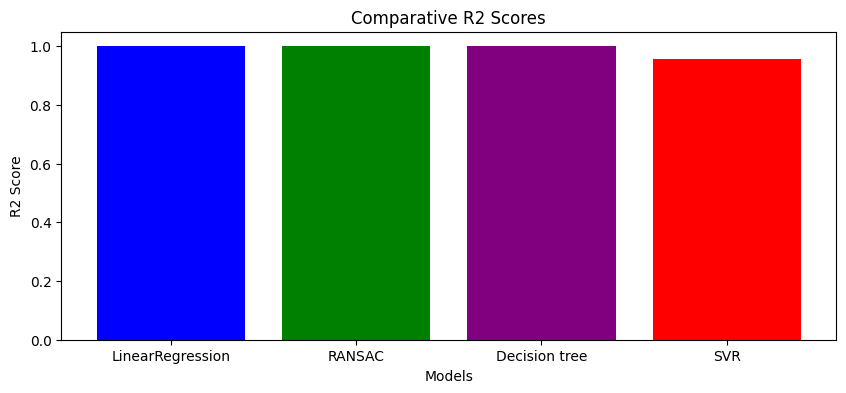

In [ ]:
# Create a comparative visualization
plt.figure(figsize=(10, 4))
models = ['LinearRegression', 'RANSAC','Decision tree', 'SVR']
r2_scores = [lr_test_r2, ransac_test_r2, dt_test_r2, svr_test_r2]
# Plot R2 Score

plt.bar(models, r2_scores, color=['blue', 'green', 'purple', 'red'])
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparative R2 Scores')
plt.show()

In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "RANSAC": RANSACRegressor(),
    "Decision tree": DecisionTreeRegressor(),
    "SVR": SVR()
}

In [ ]:
import pandas as pd

# Create a dictionary to store the results
results = {
    "Model": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "R2 Score": [],
    "MSE": [],
}

# Loop through the models and collect the results
for name, model in models.items():
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_test_std)

    train_accuracy = model.score(x_train_std, y_train)
    test_accuracy = model.score(x_test_std, y_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results["Model"].append(name)
    results["Train Accuracy"].append(train_accuracy)
    results["Test Accuracy"].append(test_accuracy)
    results["R2 Score"].append(r2)
    results["MSE"].append(mse)

# Create a pandas DataFrame from the results dictionary
df = pd.DataFrame(results)

# Print the DataFrame
print(df.to_string())


              Model  Train Accuracy  Test Accuracy  R2 Score       MSE
0  LinearRegression        0.999832       0.998782  0.998782  0.000102
1            RANSAC        0.999832       0.998782  0.998782  0.000102
2     Decision tree        1.000000       0.998689  0.998689  0.000110
3               SVR        0.953705       0.954256  0.954256  0.003824


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the models
models = {
    "LinearRegression": LinearRegression(),
    "RANSAC": RANSACRegressor(),
    "Decision tree": DecisionTreeRegressor(),
    "SVR": SVR()
}

# Define the hyperparameter grids
param_grids = {
    "LinearRegression": {},
    "RANSAC": {
        "min_samples": [50, 100, 150],
        "residual_threshold": [5, 10, 15]
    },
    "Decision tree": {
        "max_depth": [5, 10, 15],
        "min_samples_leaf": [10, 20, 30]
    },
    "SVR": {
        "kernel": ["linear", "rbf"],
        "C": [1, 10, 100]
    }
}

# Create a GridSearchCV object for each model
grid_searches = {}
for name, model in models.items():
    grid_searches[name] = GridSearchCV(model, param_grids[name], cv=5)

# Fit each GridSearchCV object to the data
for name, grid_search in grid_searches.items():
    grid_search.fit(x_train_std, y_train)

# Print the best parameters and scores for each model
for name, grid_search in grid_searches.items():
    print(f"Model: {name}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_}")
    print()


Model: LinearRegression
Best parameters: {}
Best score: 0.9998311382467471

Model: RANSAC
Best parameters: {'min_samples': 50, 'residual_threshold': 5}
Best score: 0.9998311382467471

Model: Decision tree
Best parameters: {'max_depth': 10, 'min_samples_leaf': 10}
Best score: 0.9998268229326837

Model: SVR
Best parameters: {'C': 1, 'kernel': 'rbf'}
Best score: 0.9532844012072171

